## Resume Booster

In [23]:
# import libraries
import spacy
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib.pyplot import figure

# set 
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
# Download the HTML
url = input('Enter link: ')
page = requests.get(url)
html = page.text

Enter link: https://www.linkedin.com/jobs/view/2930280877/


In [8]:
# Extract title, company and job description
soup = BeautifulSoup(html, 'html.parser')
title = soup.find('h1').string
company = soup.find('a', class_='topcard__org-name-link topcard__flavor--black-link').string.replace("\\n", "").strip()
content = soup.find('div', class_='show-more-less-html__markup show-more-less-html__markup--clamp-after-5')
body_string = ''
for x in iter(content.stripped_strings):
    body_string = body_string + x.lower()

In [12]:
# Natural Language Processing
nlp = spacy.load('en_core_web_sm')
doc = nlp(body_string)

# Noun
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(10) # 25 most common nouns

# Verbs
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
verb_freq = Counter(verbs)
common_verbs = verb_freq.most_common(10) # 25 most common nouns

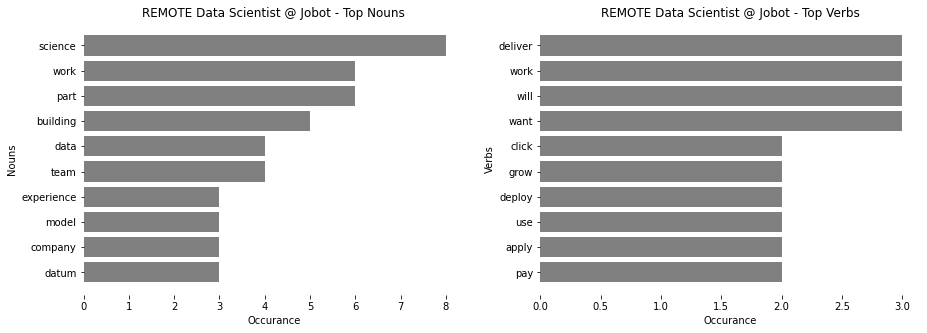

In [25]:
# Plot
# Noun
plt.subplot(1, 2, 1) # row 1, col 2 index 1
noun_list, noun_occurance = zip(*common_nouns)
plt.barh(noun_list, sorted(noun_occurance), color = ('grey'))
plt.title(f'{title} @ {company} - Top Nouns')
plt.ylabel('Nouns')
plt.xlabel('Occurance')
plt.box(False)

# Verb
plt.subplot(1, 2, 2) # row 1, col 2 index 1
verb_list, verb_occurance = zip(*common_verbs)
plt.barh(verb_list, sorted(verb_occurance), color = ('grey'))
plt.title(f'{title} @ {company} - Top Verbs')
plt.ylabel('Verbs')
plt.xlabel('Occurance')
plt.box(False)